### Problem Statement:

Given the artists file of the Spotify dataset, the aim is to predict an artist's popularity based on the other features related to them, comparing and choosing the most accurate machine learning model.

### Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline

### Loading dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Vanshika_Goyal_2024UCA1845/Dataset/artists.csv', low_memory=False)

### Exploring the data

In [3]:
df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162092 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [5]:
df.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [31]:
df.shape

(1162095, 5)

### Checking for and handling missing values

In [6]:
df.isnull().sum()

,0
id,0
followers,11
genres,0
name,3
popularity,0


Null values in columns followers and name.

Replacing null values in name column with 'Unknown'.

Replacing null values in followers column with mean of values in the column.

In [7]:
df.fillna({'name':'Unknown'}, inplace=True)
df.fillna({'followers':df['followers'].mean()}, inplace=True)

In [8]:
df.isnull().sum()

,0
id,0
followers,0
genres,0
name,0
popularity,0


### EDA

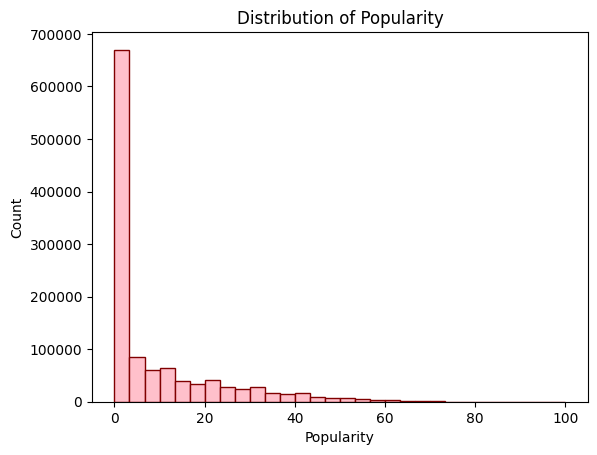

In [9]:
plt.hist(df['popularity'], bins=30, color='pink', edgecolor='maroon')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

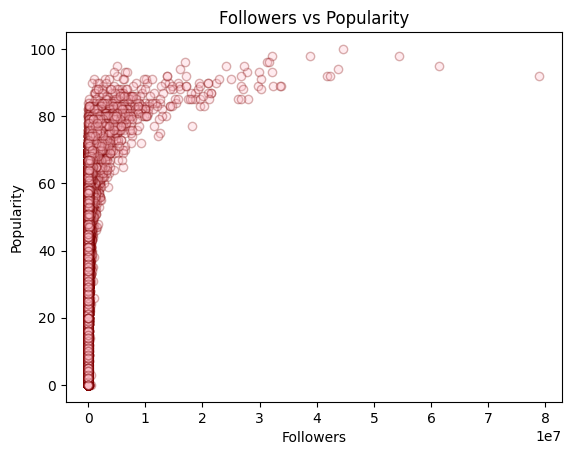

In [11]:
plt.scatter(df['followers'], df['popularity'], alpha=0.3, color='pink', edgecolor='maroon')
plt.title('Followers vs Popularity')
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.show()

### Feature engineering
Encoding using Label Encoder

In [12]:
encoder=LabelEncoder()

In [13]:
df['genre_encoded']=encoder.fit_transform(df['genres'])
df.drop(columns=['genres'], axis=1, inplace=True)

In [14]:
df['name_encoded']=encoder.fit_transform(df['name'])
df.drop(columns=['name'], axis=1, inplace=True)

In [16]:
df['id_encoded']=encoder.fit_transform(df['id'])
df.drop(columns=['id'], axis=1, inplace=True)

In [17]:
df

,followers,popularity,genre_encoded,name_encoded,id_encoded
0,0.0,0,49154,69355,63024
1,5.0,0,49154,1120866,63275
2,0.0,0,49154,848393,63320
3,0.0,0,49154,1020213,63339
4,2.0,0,49154,438294,63360
...,...,...,...,...,...
1162090,4831.0,34,11428,38459,567495
1162091,46.0,2,49154,828751,957567
1162092,257.0,10,49154,119246,212505
1162093,2357.0,15,11428,270945,879535


### Train-test split

80% train, 20% test

In [18]:
X=df.drop(columns=['popularity'], axis=1)
y=df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalization

In [19]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Comparing Different Machine Learning Models

Adding different ml model names as keys and their functions to be run as values in a dictionary models to facilitate running loop for comparison.

In [20]:
models={"Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)}

Getting the accuracy of the models.

Using dictionary to store the results with the model names as keys and values as nested dictionaries with keys as the repective metrics for comparison and values as the values of the metrics.

In [21]:
results={}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred=model.predict(X_test_scaled)

  mse=mean_squared_error(y_test, y_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y_test, y_pred)

  results[name]={'MSE':mse, 'RMSE':rmse, 'R2':r2}

Creating a dataframe from results dictionary.

In [22]:
results_df=pd.DataFrame(results).T
results_df

,MSE,RMSE,R2
Linear Regression,151.053065,12.290365,0.175494
KNN,108.605729,10.421407,0.407188
Decision Tree,107.548256,10.370548,0.412960
Random Forest,55.607779,7.457062,0.696471
XGBoost,52.160511,7.222223,0.715288


Checking and printing best model

In [29]:
best_model_name=results_df["R2"].idxmax()
best_model=models[best_model_name]
best_model_name

'XGBoost'

Visualization of r² comparison

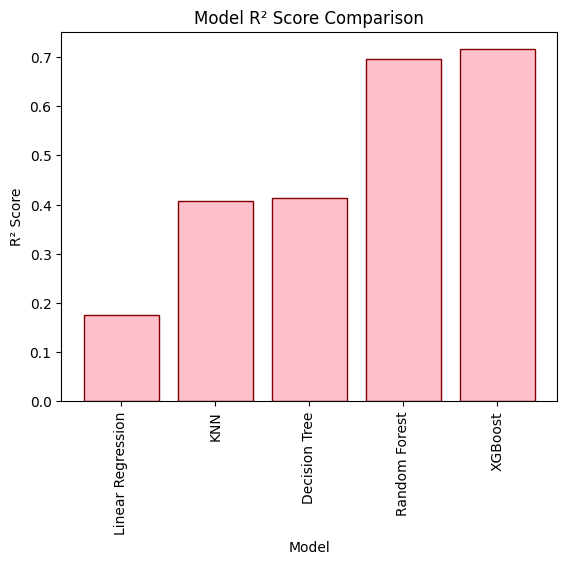

In [24]:
plt.bar(results_df.index, results_df['R2'], color='pink', edgecolor='maroon')
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=90)
plt.show()